In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

### returning the last step sequence

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### returning the full sequence

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


## Use IMDB data

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000 # number of words to consider as features
maxlen = 500 # cut texts after this number of words (among top max_features most common words)
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s - loss: 0.6311 - acc: 0.6424 - val_loss: 0.4870 - val_acc: 0.7984
Epoch 2/10
20000/20000 [==============================] - 11s - loss: 0.4034 - acc: 0.8298 - val_loss: 0.4017 - val_acc: 0.8344
Epoch 3/10
20000/20000 [==============================] - 11s - loss: 0.3287 - acc: 0.8683 - val_loss: 0.4171 - val_acc: 0.8178
Epoch 4/10
20000/20000 [==============================] - 11s - loss: 0.2543 - acc: 0.9026 - val_loss: 0.3710 - val_acc: 0.8464
Epoch 5/10
20000/20000 [==============================] - 11s - loss: 0.1877 - acc: 0.9297 - val_loss: 0.4733 - val_acc: 0.7876
Epoch 6/10
20000/20000 [==============================] - 11s - loss: 0.1470 - acc: 0.9458 - val_loss: 0.4817 - val_acc: 0.8068
Epoch 7/10
20000/20000 [==============================] - 11s - loss: 0.0948 - acc: 0.9679 - val_loss: 0.4697 - val_acc: 0.8378
Epoch 8/10
20000/20000 [==============================]

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

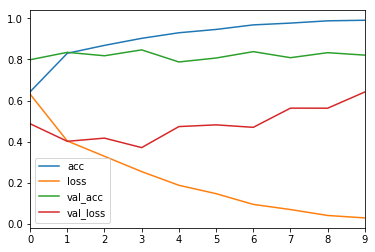

In [14]:
pd.DataFrame(history.history).plot()
plt.show()

## LSTM in keras

In [15]:
from keras.layers import LSTM

In [16]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [18]:
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 62s - loss: 0.5149 - acc: 0.7567 - val_loss: 0.4470 - val_acc: 0.8178
Epoch 2/10
20000/20000 [==============================] - 62s - loss: 0.2994 - acc: 0.8850 - val_loss: 0.2902 - val_acc: 0.8854
Epoch 3/10
20000/20000 [==============================] - 62s - loss: 0.2427 - acc: 0.9084 - val_loss: 0.3493 - val_acc: 0.8458
Epoch 4/10
20000/20000 [==============================] - 62s - loss: 0.1996 - acc: 0.9254 - val_loss: 0.5017 - val_acc: 0.8516
Epoch 5/10
20000/20000 [==============================] - 62s - loss: 0.1821 - acc: 0.9330 - val_loss: 0.2845 - val_acc: 0.8846
Epoch 6/10
20000/20000 [==============================] - 62s - loss: 0.1588 - acc: 0.9429 - val_loss: 0.2990 - val_acc: 0.8906
Epoch 7/10
20000/20000 [==============================] - 62s - loss: 0.1472 - acc: 0.9458 - val_loss: 0.3063 - val_acc: 0.8816
Epoch 8/10
20000/20000 [==============================]

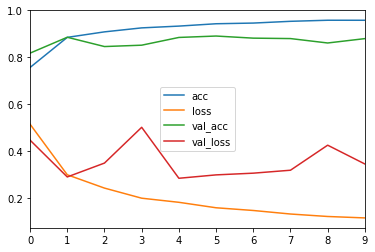

In [19]:
pd.DataFrame(history.history).plot()
plt.show()